<a href="https://colab.research.google.com/github/GhassenSmaoui/Wine_dataset/blob/master/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This data set is obtained from UCI machine learning repository :  
https://archive.ics.uci.edu/ml/datasets/Wine

These data are the results of a chemical analysis of
      wines grown in the same region in Italy but derived from three
      different cultivars.
      The analysis determined the quantities of 13 constituents
      found in each of the three types of wines. 

In [60]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine (2).csv


In [61]:

import io
import pandas as pd
wine_data = pd.read_csv(io.BytesIO(uploaded['wine.csv']), sep = ';')
wine_data.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735



 The attributes are :
 
  	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline  

In [0]:
wine_data = wine_data.rename(columns={"Column1": "Alcohol", "Column2": "Malic acid" , "Column3": "Ash", "Column4": "Alcalinity of ash ", "Column5": "Magnesium", "Column6": "c", "Column7": "Flavanoids", "Column8": "Nonflavanoid phenols", "Column9": "Proanthocyanins", "Column10": "Color intensity", "Column11": "Hue", "Column12": "diluted wines", "Column13": "Proline"})

In [0]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
wine_data['Alcohol']-=1

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
from sklearn.model_selection import train_test_split
from sklearn import preprocessing # the preprocessing module is used in the below cell to scale the data (normalize it )

In [0]:
#from sklearn.utils import shuffle
#wine_data = shuffle(wine_data)

In [0]:
wine_data = wine_data.reindex(np.random.permutation(wine_data.index))

In [0]:
wine_data.reset_index(inplace=True, drop=True) 

In [69]:
wine_data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,c,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline,Column14
0,1,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.8,1.23,2.50,607
1,2,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.6,0.70,2.47,780
2,1,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.9,1.23,2.74,428
3,2,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
4,2,13.50,3.12,2.62,24.0,123,1.40,1.57,0.22,1.25,8.6,0.59,1.30,500


In [0]:
Y = tf.keras.utils.to_categorical(wine_data['Alcohol'], dtype='int')

In [71]:
wine_data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,c,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline,Column14
0,1,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.8,1.23,2.50,607
1,2,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.6,0.70,2.47,780
2,1,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.9,1.23,2.74,428
3,2,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
4,2,13.50,3.12,2.62,24.0,123,1.40,1.57,0.22,1.25,8.6,0.59,1.30,500


In [0]:


wine_data.drop( ['Alcohol'], axis = 1, inplace= True)

In [73]:
wine_data.head()

,Malic acid,Ash,Alcalinity of ash,Magnesium,c,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline,Column14
0,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.8,1.23,2.50,607
1,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.6,0.70,2.47,780
2,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.9,1.23,2.74,428
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
4,13.50,3.12,2.62,24.0,123,1.40,1.57,0.22,1.25,8.6,0.59,1.30,500


In [0]:
X_train, X_test , Y_train , Y_test = train_test_split(preprocessing.scale(wine_data), Y, random_state = 0)

In [75]:
Y[:5]

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 11, input_shape = [13], activation = tf.nn.leaky_relu),
    tf.keras.layers.Dense(10, input_shape = [11], activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(9, input_shape = [10], activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(8, input_shape = [9], activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(3, input_shape = [8], activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy'
             )

In [78]:
#model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))
history = model.fit(X_train, Y_train, epochs=1000,  verbose=False)
print("Finished training the model")

Finished training the model


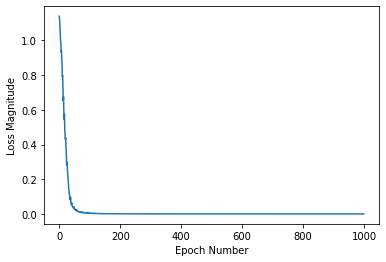

In [79]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])


In [0]:
 train_prediction = model.predict(X_train)
 train_prediction_integer = np.zeros(train_prediction.shape, dtype=int)

In [0]:
for i in range(train_prediction.shape[0]):
  train_prediction_integer[i,np.argmax(train_prediction[i])] = 1

In [82]:
inc = 0
for i in range(Y_train.shape[0]):
  if np.array_equal(Y_train[i], train_prediction_integer[i]):
    inc +=1
performance_value = (inc /Y_train.shape[0])*100
print (performance_value) 

100.0


In [83]:

#Accuracy of the predicted values in the train set
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_train,train_prediction_integer))
#print(confusion_matrix(Y_test,test_prediction_integer))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        35

   micro avg       1.00      1.00      1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133
 samples avg       1.00      1.00      1.00       133



In [0]:
 test_prediction = model.predict(X_test)
 test_prediction_integer = np.zeros(test_prediction.shape, dtype=int)

In [0]:
for i in range(test_prediction.shape[0]):
  test_prediction_integer[i,np.argmax(test_prediction[i])] = 1

In [86]:
inc = 0
for i in range(Y_test.shape[0]):
  if np.array_equal(Y_test[i], test_prediction_integer[i]):
    inc +=1
test_performance_value = (inc /Y_test.shape[0])*100
print (test_performance_value) 

95.55555555555556


In [87]:

#Accuracy of the predicted values in the test set
print(classification_report(Y_test,test_prediction_integer))
#print(confusion_matrix(Y_test,test_prediction_integer))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.90      0.95        20
           2       0.93      1.00      0.96        13

   micro avg       0.96      0.96      0.96        45
   macro avg       0.95      0.97      0.96        45
weighted avg       0.96      0.96      0.96        45
 samples avg       0.96      0.96      0.96        45

